## Task about lakes

- Generate 20 random variable from 1 to 100
- Draw the plot of the  sequence 
- Lets assume each point represent the height and so all plotting is 2d mountains. 
- Then consider the unlimited rain from above - cavities become lakes full of water. 
- Determine the deepest lake

In [217]:
import numpy as np
import matplotlib.pyplot as plt

[88 26 71 56 34 93  4 53 87 97 23 18 54 48 78 40 70 89  4 59]


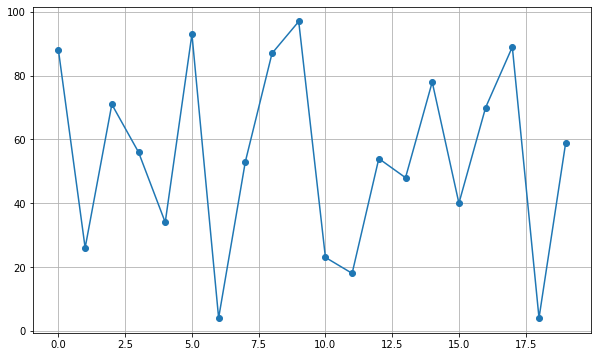

In [218]:
np.random.seed(2023)
points = np.random.randint(1,100,20)

print(points)

plt.figure(figsize=(10,6))
plt.plot(points, marker='o')
plt.grid(True)

- ### Primary idea for the solution.
- Step 1. Find all the peaks and bottoms, visualize.
- Step 2. Filter adjacent peaks/bottoms so only the highest/lowest stays, visualize.
- Step 3. Calculate depths for each two peaks and a bottom.
- Step 4. Choose the deepest and visualize.

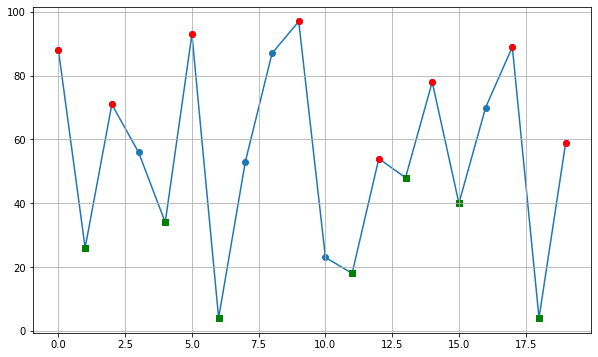

In [219]:
# - Step 1. Find all the peaks and bottoms, visualize.

points_aug = np.concatenate([[0], points, [0]])
peaks, = np.where((points > points_aug[:-2]) & (points > points_aug[2:]))
bottoms, = np.where((points < points_aug[:-2]) & (points < points_aug[2:]))

plt.figure(figsize=(10,6))
plt.plot(points, marker='o', zorder=0)
plt.scatter(peaks, points[peaks], color='red', zorder=2)
plt.scatter(bottoms, points[bottoms], marker='s', color='green', zorder=1)
plt.grid(True)
plt.show()

The primary idea proves to be insufficient as there might be complicated cases of bottoms/peaks sequences 
I have't thought of. E.g when there are peaks "under water" and they should not be considered as actual peaks.

- Now for each bottom point I want to find two highest peaks, 
one for each part of the array, split by this bottom point.
- Then It will be correct to measure depth between those 2 peaks and bottom.

In [220]:
# Step 2. Measure the depth of each lake.

max_depth = 0
max_lake = np.array([])
for bot in bottoms:
    # left and right peaks will always be defined thank to the way we detected bottoms
    left_peak = np.argmax(points[:bot])
    right_peak = np.argmax(points[bot+1:]) + bot + 1
    depth = min(points[left_peak], points[right_peak]) - points[bot]
    if depth > max_depth:
        max_depth = depth
        max_lake = np.array([left_peak, bot, right_peak])

print(max_depth, max_lake)


89 [5 6 9]


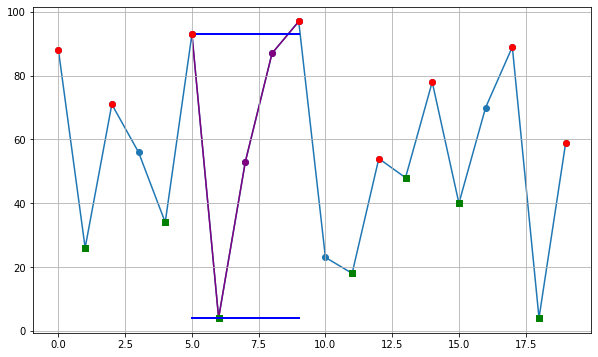

In [221]:
# Step 3. Visualize.

plt.figure(figsize=(10,6))
plt.plot(points, marker='o', zorder=0)
plt.scatter(peaks, points[peaks], color='red', zorder=3)
plt.scatter(bottoms, points[bottoms], marker='s', color='green', zorder=2)

water_level = points[max_lake[1]] + max_depth
bottom_level = points[max_lake[1]]

plt.plot(range(max_lake[0], max_lake[2]+1), points[max_lake[0]:max_lake[2]+1], 
         marker='o', color='purple', zorder=1)
plt.plot([max_lake[0], max_lake[2]],
         [water_level, water_level], color='blue', linewidth=2)
plt.plot([max_lake[0], max_lake[2]],
         [bottom_level, bottom_level], color='blue', linewidth=2)
plt.grid(True)
plt.show()

In [222]:
# And now we can play with the solution a bit.

def find_deepest_lake(points):
    points_aug = np.concatenate([[0], points, [0]])
    peaks, = np.where((points > points_aug[:-2]) & (points > points_aug[2:]))
    bottoms, = np.where((points < points_aug[:-2]) & (points < points_aug[2:]))

    max_depth = 0
    max_lake = np.array([])
    for bot in bottoms:
        # left and right peaks will always be defined thank to the way we detected bottoms
        left_peak = np.argmax(points[:bot])
        right_peak = np.argmax(points[bot+1:]) + bot + 1
        depth = min(points[left_peak], points[right_peak]) - points[bot]
        if depth > max_depth:
            max_depth = depth
            max_lake = np.array([left_peak, bot, right_peak])

    plt.figure(figsize=(10,6))
    plt.plot(points, marker='o', zorder=0)
    plt.scatter(peaks, points[peaks], color='red', zorder=3)
    plt.scatter(bottoms, points[bottoms], marker='s', color='green', zorder=2)

    water_level = points[max_lake[1]] + max_depth
    bottom_level = points[max_lake[1]]

    plt.plot(range(max_lake[0], max_lake[2]+1), points[max_lake[0]:max_lake[2]+1], 
            marker='o', color='purple', zorder=1)
    plt.plot([max_lake[0], max_lake[2]],
            [water_level, water_level], color='blue', linewidth=2)
    plt.plot([max_lake[0], max_lake[2]],
            [bottom_level, bottom_level], color='blue', linewidth=2)
    plt.grid(True)
    plt.show()

def display_landscape(points):
        plt.figure(figsize=(10,6))
        plt.plot(points, marker='o')
        plt.grid(True)
    

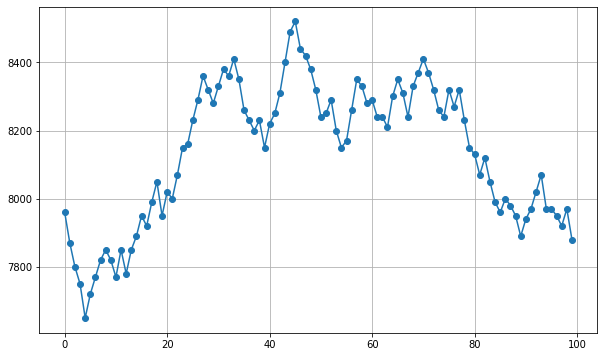

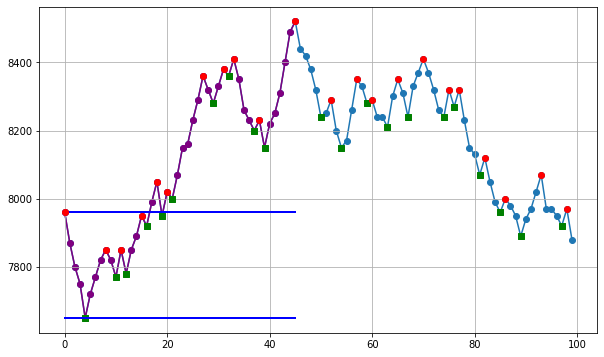

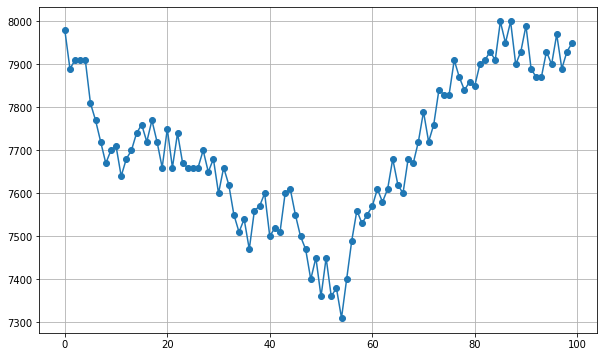

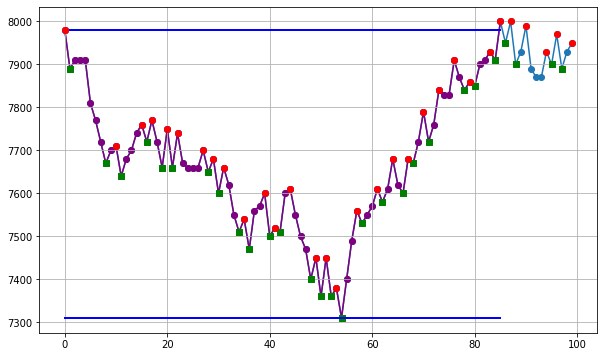

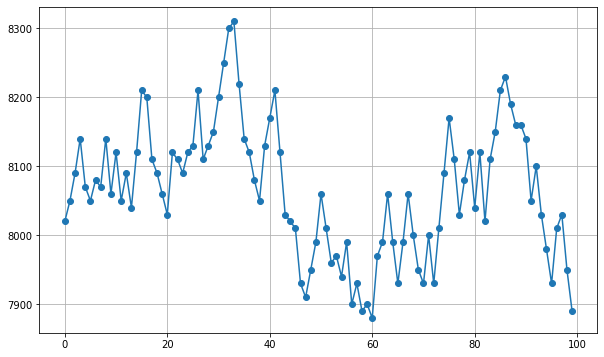

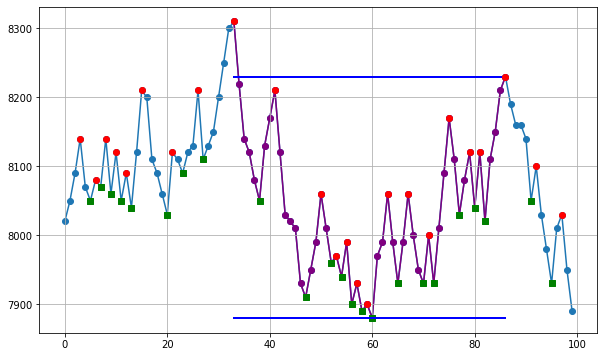

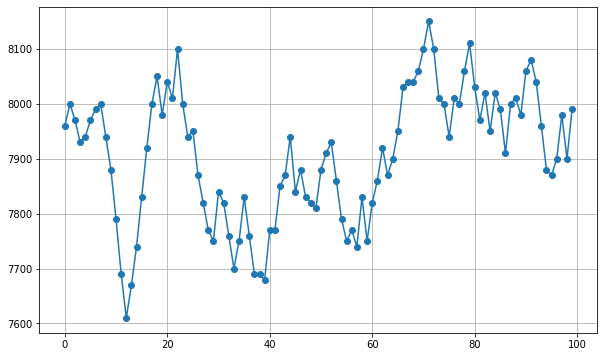

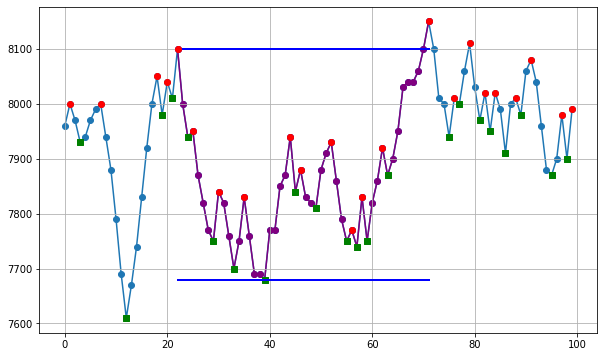

In [223]:
np.random.seed(2023)

points_100 = np.random.randint(-10, 10, 100)
points_100 = np.cumsum(points_100 * 10) + 8000
display_landscape(points_100)
find_deepest_lake(points_100)

points_100 = np.random.randint(-10, 10, 100)
points_100 = np.cumsum(points_100 * 10) + 8000
display_landscape(points_100)
find_deepest_lake(points_100)

points_100 = np.random.randint(-10, 10, 100)
points_100 = np.cumsum(points_100 * 10) + 8000
display_landscape(points_100)
find_deepest_lake(points_100)

points_100 = np.random.randint(-10, 10, 100)
points_100 = np.cumsum(points_100 * 10) + 8000
display_landscape(points_100)
find_deepest_lake(points_100)